In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D,Activation
from keras.applications import VGG16

train_dir = "C://Users//maste//Desktop//dl_project//data1//BasicFinalDatabase//Train"
valid_dir = "C://Users//maste//Desktop//dl_project//data1//BasicFinalDatabase/Test"

img_width, img_height = 224, 224

conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(img_width, img_height, 3))

# Show architecture
conv_base.summary()


import os, shutil
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 24

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count,50))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='categorical')
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels


train_features, train_labels = extract_features(train_dir, 240*50)
validation_features, validation_labels = extract_features(valid_dir, 60*50)

epochs = 200

model = Sequential()


model.add(MaxPooling2D(input_shape=(7,7,512),pool_size=(2,2), strides=(2,2), padding='valid'))


model.add(Flatten())

model.add(Dense(4096))
model.add(Activation('relu'))

model.add(Dropout(0.15))


model.add(Dense(4096))
model.add(Activation('relu'))

model.add(Dropout(0.15))


model.add(Dense(1000))
model.add(Activation('relu'))

model.add(Dropout(0.15))

model.add(Dense(50))
model.add(Activation('softmax'))
model.summary()





from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
checkpoint = ModelCheckpoint('vgg16_mod.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  
red=ReduceLROnPlateau(monitor="val_loss",factor=0.1,patience=5,mode="auto")
early=EarlyStopping(monitor="val_loss",min_delta=1e-4,patience=10,mode="auto")
# Compile model
from keras.optimizers import Adam,SGD
sgd=SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['acc'])

# Train model
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    callbacks=[checkpoint,red,early],
                    validation_data=(validation_features, validation_labels))






Using TensorFlow backend.








_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
____

12000/12000 [==============================] - 31s 3ms/step - loss: 1.3054 - acc: 0.5827 - val_loss: 0.9087 - val_acc: 0.7267

Epoch 00002: val_loss improved from 1.28878 to 0.90873, saving model to vgg16_mod.h5
Epoch 3/200
12000/12000 [==============================] - 31s 3ms/step - loss: 1.2331 - acc: 0.6094 - val_loss: 0.8867 - val_acc: 0.7103

Epoch 00003: val_loss improved from 0.90873 to 0.88669, saving model to vgg16_mod.h5
Epoch 4/200
12000/12000 [==============================] - 31s 3ms/step - loss: 1.0704 - acc: 0.6555 - val_loss: 0.7555 - val_acc: 0.7593

Epoch 00004: val_loss improved from 0.88669 to 0.75549, saving model to vgg16_mod.h5
Epoch 5/200
12000/12000 [==============================] - 31s 3ms/step - loss: 0.9256 - acc: 0.6988 - val_loss: 0.8332 - val_acc: 0.7443

Epoch 00005: val_loss did not improve from 0.75549
Epoch 6/200
12000/12000 [==============================] - 31s 3ms/step - loss: 0.8525 - acc: 0.7230 - val_loss: 0.5811 - val_acc: 0.8130

Epoch 00006

12000/12000 [==============================] - 31s 3ms/step - loss: 0.0612 - acc: 0.9787 - val_loss: 0.2520 - val_acc: 0.9300

Epoch 00042: val_loss did not improve from 0.24211
Epoch 43/200
12000/12000 [==============================] - 31s 3ms/step - loss: 0.0583 - acc: 0.9799 - val_loss: 0.2482 - val_acc: 0.9340

Epoch 00043: val_loss did not improve from 0.24211
Epoch 44/200
12000/12000 [==============================] - 31s 3ms/step - loss: 0.0576 - acc: 0.9818 - val_loss: 0.2485 - val_acc: 0.9337

Epoch 00044: val_loss did not improve from 0.24211
Epoch 45/200
12000/12000 [==============================] - 31s 3ms/step - loss: 0.0600 - acc: 0.9808 - val_loss: 0.2480 - val_acc: 0.9330

Epoch 00045: val_loss did not improve from 0.24211
Epoch 46/200
12000/12000 [==============================] - 31s 3ms/step - loss: 0.0536 - acc: 0.9822 - val_loss: 0.2478 - val_acc: 0.9333

Epoch 00046: val_loss did not improve from 0.24211


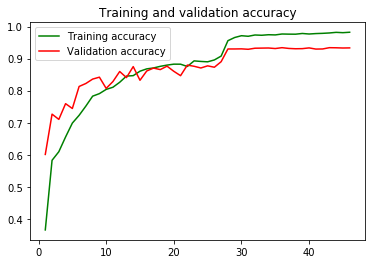

<Figure size 432x288 with 0 Axes>

"\nplt.plot(epochs, loss, 'g', label='Training loss')\nplt.plot(epochs, val_loss, 'r', label='Validation loss')\nplt.title('Training and validation loss')\nplt.legend()\n\nplt.show()\n"

In [3]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.show()
'''
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
'''


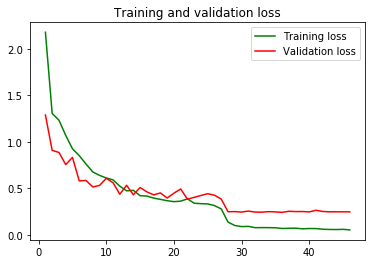

In [4]:
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()